## Jai shree Ram

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df.drop_duplicates(keep = 'first', inplace = True)

In [11]:
df.duplicated().sum()

0

#### All duplicates are removed

In [12]:
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
233,59,male,27.50,1,no,southwest,12333.8280
1302,25,female,20.80,1,no,southwest,3208.7870
280,40,female,28.12,1,yes,northeast,22331.5668
1093,22,female,30.40,0,yes,northwest,33907.5480


# - EDA

In [13]:
num_cols = df.columns[df.dtypes != 'O']
cat_cols = df.columns[df.dtypes == "O"]

In [14]:
num_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [15]:
cat_cols

Index(['sex', 'smoker', 'region'], dtype='object')

### - Handling numerical columns 

In [16]:
df[num_cols].sample(4)

,age,bmi,children,charges
300,36,27.550,3,6746.74250
643,23,34.960,3,4466.62140
36,62,32.965,3,15612.19335
159,50,27.830,3,19749.38338


In [17]:
df[num_cols].head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [18]:
# handling outliers

Text(0.5, 0, 'charges')

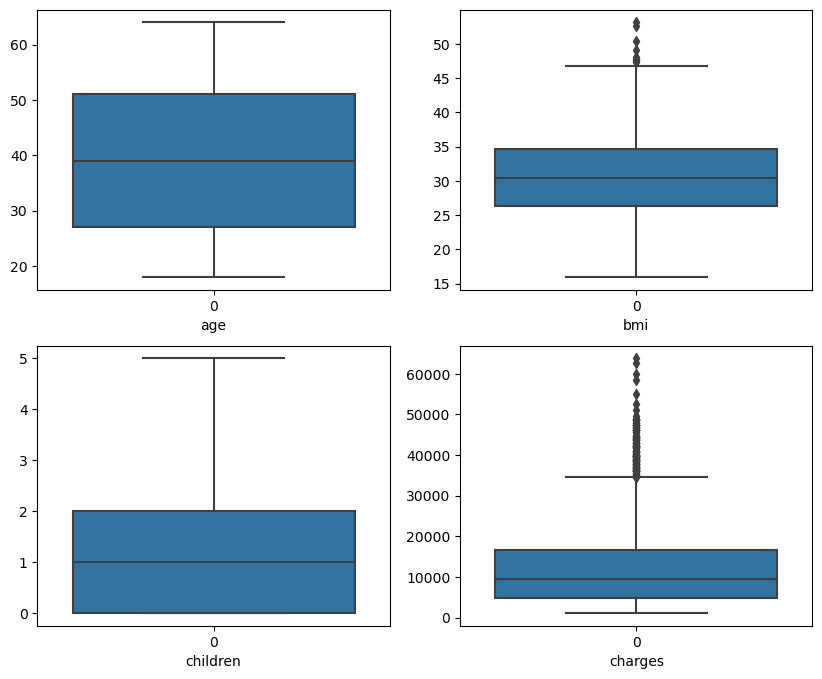

In [19]:
plt.figure(figsize= (10,8) )

plt.subplot(2,2,1)
sns.boxplot(df['age'])
plt.xlabel('age')

plt.subplot(2,2,2)
sns.boxplot(df['bmi'])
plt.xlabel('bmi')

plt.subplot(2,2,3)
sns.boxplot(df['children'])
plt.xlabel('children')

plt.subplot(2,2,4)
sns.boxplot(df['charges'])
plt.xlabel('charges')

Text(0.5, 0, 'charges')

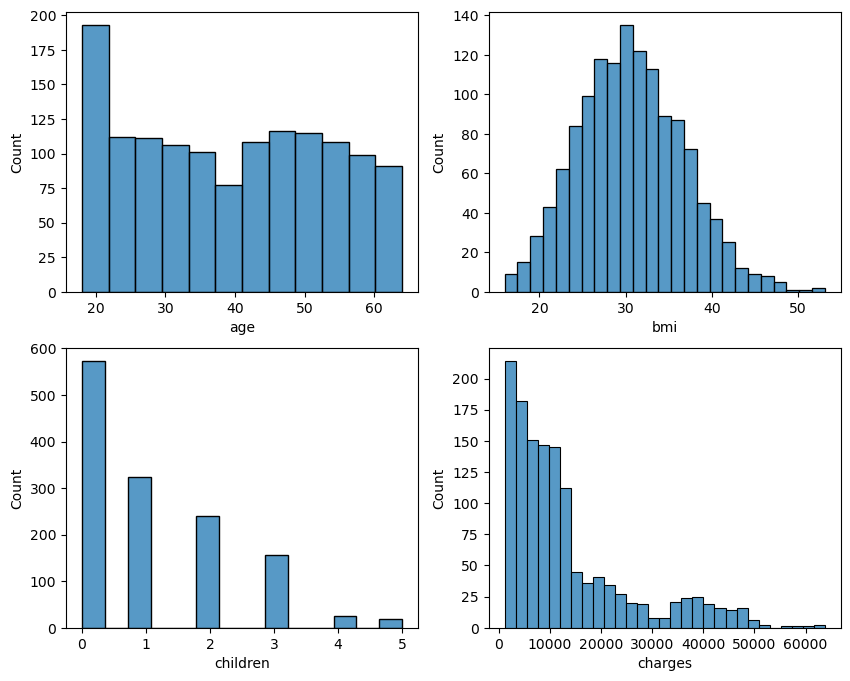

In [20]:
plt.figure(figsize= (10,8) )

plt.subplot(2,2,1)
sns.histplot(df['age'])
plt.xlabel('age')

plt.subplot(2,2,2)
sns.histplot(df['bmi'])
plt.xlabel('bmi')

plt.subplot(2,2,3)
sns.histplot(df['children'])
plt.xlabel('children')

plt.subplot(2,2,4)
sns.histplot(df['charges'])
plt.xlabel('charges')

### - All columns seems okay except charges and bmi, so let's inspect them.

In [21]:
df['charges'].describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

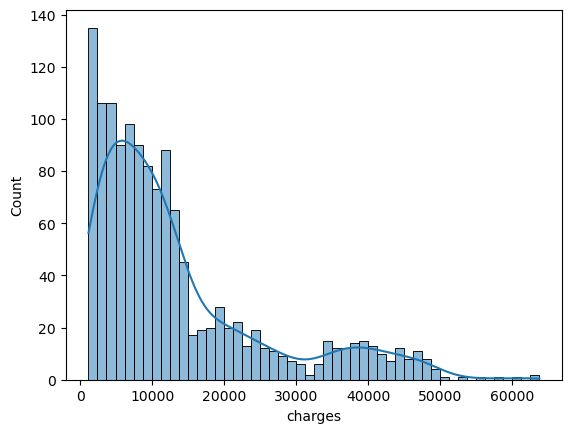

In [22]:
sns.histplot(df['charges'], kde= True, bins= 50)

In [23]:
upper_limit = df['charges'].mean() + 3 * df['charges'].std()

In [24]:
upper_limit

49610.20045568848

In [25]:
df[df['charges'] >= upper_limit ]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


### These outlier seems reasonable. So we won't remove or cap them.

In [26]:
df['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [27]:
u_limit = df['bmi'].mean() + 3 * df['bmi'].std()

In [28]:
u_limit

48.96485698651382

In [29]:
df[df['bmi'] >= u_limit]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


### - These outliers also seems reasonable, so we won't remove or cap them.

In [30]:
for i in df[num_cols]:
    print(df[i].isnull().sum())

0
0
0
0


### - No outliers in numerical cols

In [31]:
df[num_cols].corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


### - The correlation coefficients seems good and there is no multicolinearity among the input variables. 

### - Now comes categorical variables.

In [32]:
df[cat_cols].sample(3)

,sex,smoker,region
43,female,no,southeast
1026,male,yes,northwest
1221,male,no,southeast


In [33]:
df[cat_cols].describe()

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


<Axes: xlabel='region', ylabel='count'>

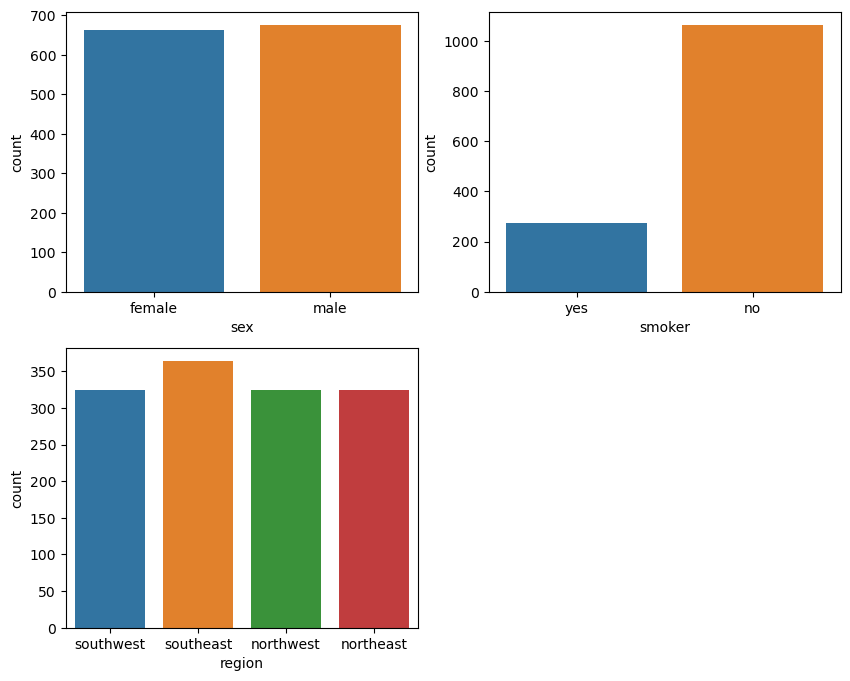

In [34]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.countplot(x= df['sex'])

plt.subplot(2,2,2)
sns.countplot(x= df['smoker'])

plt.subplot(2,2,3)
sns.countplot(x = df['region'])

### - Everything seems good except smoker column. We will use ensembles algos which can handle imbalance data by assigning more weights to minority class.

In [35]:
for i in df[cat_cols]:
    print(i, df[i].isnull().sum())

sex 0
smoker 0
region 0


In [36]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

### - No missing values

### - Now dealing with categorical encoding

In [37]:
df[cat_cols].sample(2)

,sex,smoker,region
1086,male,no,northeast
809,male,no,northeast


#### - Encoding of categorical variables

In [38]:
df.replace({'region':{'southwest':0, "southeast":1, "northwest":2, "northeast":3}}, inplace=True)

In [39]:
df.replace({'sex': {'male':1, "female":0}, 'smoker': {'yes':1, 'no':0}},inplace = True)

In [40]:
df.head(2)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,0,16884.9240
1,18,1,33.77,1,0,1,1725.5523


### - Encoding of categorical column is completed.

In [41]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [42]:
df.shape

(1337, 7)

In [43]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


# Model building 

In [44]:
X = df.drop(['charges'], axis = 1)

In [45]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [46]:
y = df['charges']
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()

In [51]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
X_train_scaled = pd.DataFrame(X_train, columns = scaler.get_feature_names_out())
X_test_scaled = pd.DataFrame(X_test, columns= scaler.get_feature_names_out())

In [53]:
X_train_scaled

,age,sex,bmi,children,smoker,region
0,-1.157680,0.971409,-0.996928,-0.907908,-0.500292,1.383946
1,-1.300619,0.971409,-0.792762,0.766904,-0.500292,1.383946
2,0.914926,-1.029432,1.154664,0.766904,-0.500292,0.477983
3,1.701087,0.971409,1.806837,-0.907908,-0.500292,-0.427981
4,0.557580,-1.029432,-0.651417,0.766904,-0.500292,1.383946
...,...,...,...,...,...,...
1064,0.843457,-1.029432,0.730628,0.766904,1.998831,1.383946
1065,-0.871804,0.971409,2.539188,0.766904,-0.500292,-1.333944
1066,-1.372088,0.971409,-1.411872,-0.070502,-0.500292,-1.333944
1067,-0.085643,-1.029432,-0.419974,1.604310,-0.500292,-1.333944


In [54]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [56]:
lr = LinearRegression()
las = Lasso()
ridge = Ridge()
enr = ElasticNet()

rft = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()

In [57]:
model_list = [lr, las, ridge, enr, rft, gbr, abr, dtr, svr, knr]
model_score = []

In [58]:
model_score.clear()
for i in model_list:
    
    i.fit(X_train_scaled, y_train)
    y_pred = i.predict(X_test_scaled)
    
    print(str(i)[:-2], '\n')
    print('MSE:', mean_squared_error(y_test, y_pred))
    print('MAE:', mean_absolute_error(y_test, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
    r2score = r2_score(y_test, y_pred)
    print('r2score:', r2score)
    
    n, k= X_test.shape
    adj_r2score = 1 - (((1-r2score) * (n-1))/(n-k-1))
    print('Adj_r2:', adj_r2score, '\n')
    
    model_score.append(r2score)
    
print(max(model_score) * 100)

LinearRegression 

MSE: 35493102.61165056
MAE: 4182.3531552883005
RMSE: 5957.608799816463
r2score: 0.8068466322629109
Adj_r2: 0.80240632495861 

Lasso 

MSE: 35499619.31181159
MAE: 4182.465000194655
RMSE: 5958.155697177743
r2score: 0.8068111683983847
Adj_r2: 0.8023700458328303 

Ridge 

MSE: 35526842.91835417
MAE: 4184.752307828585
RMSE: 5960.439825915045
r2score: 0.8066630176057311
Adj_r2: 0.8022184892748284 

ElasticNet 

MSE: 60383140.45975978
MAE: 5512.49723693336
RMSE: 7770.65894630306
r2score: 0.6713951140885652
Adj_r2: 0.6638409787802564 

RandomForestRegressor 

MSE: 22240855.381141145
MAE: 2607.944590131717
RMSE: 4716.021138750456
r2score: 0.878965325595096
Adj_r2: 0.8761829192869373 

GradientBoostingRegressor 

MSE: 18200080.659376763
MAE: 2515.2487258562564
RMSE: 4266.155254954601
r2score: 0.9009552106247438
Adj_r2: 0.8986783189149679 

AdaBoostRegressor 

MSE: 30625419.718215846
MAE: 4842.736980911563
RMSE: 5534.023827037235
r2score: 0.8333365493104702
Adj_r2: 0.8295052056

In [59]:
from sklearn.model_selection import cross_val_score, KFold

In [60]:
cv = KFold(shuffle = True, n_splits = 4, random_state=42)

In [61]:
cv_score = cross_val_score(gbr, X, y, cv = cv, scoring = 'r2', n_jobs = -1)

In [62]:
cv_score.mean()

0.8548470806500118

### Best model is Gradientboost ensemble model, with an score of 90%.

In [73]:
import pickle 

In [74]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(gbr, open('model.pkl', 'wb'))

In [64]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
20,60,0,36.005,0,0,3,13228.84695
895,61,0,44.000,0,0,0,13063.88300
1060,24,1,32.010,0,0,1,1981.58190


In [72]:
gbr.predict(scaler.transform([[61, 0, 44, 0, 0, 0]]))

C:\Users\nancy\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\nancy\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([13354.08780402])

In [ ]:
lr = LinearRegression()
las = Lasso()
ridge = Ridge()
enr = ElasticNet()

rft = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

dtr = DecisionTreeRegressor()
svr = SVR()
knr = KNeighborsRegressor()